In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 20]

% matplotlib inline

UsageError: Line magic function `%` not found.


### Read data

In [2]:
ABSOLUTE_PATH = '.'
DATA_FOLDER = ABSOLUTE_PATH + f'/../../data/'
OUTPUT_FOLDER = f'/plots/'

STATS_FILES = [
    'g1-piek/scenario1/automatic_evaluations/g1s1',
    'g1-piek/scenario2/automatic_evaluations/g1s2',
    'g2-jaap/scenario1/automatic_evaluations/g2s1',
    'g2-jaap/scenario2/automatic_evaluations/g2s2',
    'g4-tae/scenario1/automatic_evaluations/g4s1',
    'g4-tae/scenario2/automatic_evaluations/g4s2'
]

COLUMNS_TO_DROP = [
    'GROUP A - Average node connectivity',
    'GROUP A - Number of components',

    'GROUP B - Class property ratio', 'GROUP B - Property class ratio',
    'GROUP B - Total classes', 'GROUP B - Total properties',
    'GROUP B - Inheritance richness',
    'GROUP B - Total general concept inclusions', 'GROUP B - Total concept assertions',
    'GROUP B - Total role assertions',
    'GROUP B - Total instances', 'GROUP B - Total entities', 'GROUP B - Total tBox axioms',
    'GROUP B - Relationship richness', 'GROUP B - Attribute richness',

    'GROUP C - Total interactions'
]

COLUMNS_TO_KEEP = ['System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact',

                   'Overall Human Rating', 'Interesting', 'Engaging', 'Specific',
                   'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable', 'Fluent',

                   'GROUP A - Total nodes', 'GROUP A - Total edges',
                   'GROUP A - Average degree', 'GROUP A - Average degree centrality', 'GROUP A - Average closeness',
                   'GROUP A - Average degree connectivity', 'GROUP A - Average assortativity',
                   'GROUP A - Number of strong components',
                   'GROUP A - Centrality entropy', 'GROUP A - Closeness entropy', 'GROUP A - Sparseness',

                   'GROUP B - Total axioms',
                   'GROUP B - Average population',

                   'GROUP C - Total triples', 'GROUP C - Total world instances',
                   'GROUP C - Total claims', 'GROUP C - Total perspectives', 'GROUP C - Total mentions',
                   'GROUP C - Total conflicts',
                   'GROUP C - Total sources', 'GROUP C - Total utterances',
                   'GROUP C - Ratio claim to triples', 'GROUP C - Ratio perspectives to triples',
                   'GROUP C - Ratio conflicts to triples',
                   'GROUP C - Ratio perspectives to claims', 'GROUP C - Ratio mentions to claims',
                   'GROUP C - Ratio conflicts to claims', 'GROUP C - Average perspectives per claim',
                   'GROUP C - Average mentions per claim', 'GROUP C - Average turns per interaction',
                   'GROUP C - Average claims per source', 'GROUP C - Average perspectives per source',

                   'Conversation']



In [3]:
convo_dfs = []

for file in STATS_FILES:
    # Read data
    convo_df = pd.read_csv(DATA_FOLDER + f"{file}.csv", header=0)

    # Format all equally
    convo_df['Conversation'] = file.split('/')[-1]
    convo_df = convo_df.set_index('Turn')

    # Manage metrics to be considered 
    columns_to_drop = [c for c in COLUMNS_TO_DROP if c in convo_df.columns]
    convo_df.drop(columns=columns_to_drop, inplace=True)
    columns_missing = [c for c in COLUMNS_TO_KEEP if c not in convo_df.columns]

    # rename
    convo_df.rename(columns={'System llh': 'AUTOMATIC - System llh', 'MLM llh': 'AUTOMATIC - MLM llh',
                             'USR DLcontext': 'AUTOMATIC - USR DLcontext', 'USR DLfact': 'AUTOMATIC - USR DLfact'},
                    inplace=True)
    convo_df.rename(columns={'Overall Human Rating': 'HUMAN - Overall Human Rating',
                             'Interesting': 'HUMAN - Interesting', 'Engaging': 'HUMAN - Engaging',
                             'Specific': 'HUMAN - Specific', 'Relevant': 'HUMAN - Relevant',
                             'Correct': 'HUMAN - Correct',
                             'Semantically Appropriate': 'HUMAN - Semantically Appropriate',
                             'Understandable': 'HUMAN - Understandable',
                             'Fluent': 'HUMAN - Fluent'}, inplace=True)

    # Show results
    print(f'{len(convo_df)} turns, {len(convo_df.columns)} metrics (missing {columns_missing} metrics')

    convo_dfs.append(convo_df)

83 turns, 46 metrics (missing [] metrics
57 turns, 46 metrics (missing [] metrics
46 turns, 46 metrics (missing [] metrics
56 turns, 46 metrics (missing [] metrics
78 turns, 46 metrics (missing [] metrics
97 turns, 46 metrics (missing [] metrics


### Average human per conversation

In [4]:
human_avg = pd.DataFrame()
for convo_df in convo_dfs:
    human_avg[convo_df.loc[0, 'Conversation']] = convo_df[['HUMAN - Overall Human Rating', 'HUMAN - Interesting',
                                                           'HUMAN - Engaging', 'HUMAN - Specific', 'HUMAN - Relevant',
                                                           'HUMAN - Correct', 'HUMAN - Semantically Appropriate',
                                                           'HUMAN - Understandable', 'HUMAN - Fluent']].mean()
human_avg

,g1s1,g1s2,g2s1,g2s2,g4s1,g4s2
HUMAN - Overall Human Rating,3.100402,3.412121,1.142857,1.086538,2.746622,2.290323
HUMAN - Interesting,2.626506,2.939394,1.380952,1.596154,3.041667,2.196237
HUMAN - Engaging,2.783133,2.945455,3.095238,2.009615,2.871622,2.387097
HUMAN - Specific,2.863454,2.563636,2.190476,2.086538,2.712838,2.155914
HUMAN - Relevant,3.184739,3.872727,2.690476,2.836538,2.904279,2.268817
HUMAN - Correct,3.080321,3.909091,2.642857,2.644231,2.956081,2.446237
HUMAN - Semantically Appropriate,2.991968,3.957576,2.666667,2.442308,2.959459,2.516129
HUMAN - Understandable,3.706827,4.121212,3.380952,3.298077,3.460586,3.231183
HUMAN - Fluent,3.586345,4.151515,3.000000,2.615385,3.368243,3.263441


In [5]:
human_avg.mean(axis=1)

HUMAN - Overall Human Rating        2.296477
HUMAN - Interesting                 2.296818
HUMAN - Engaging                    2.682026
HUMAN - Specific                    2.428809
HUMAN - Relevant                    2.959596
HUMAN - Correct                     2.946470
HUMAN - Semantically Appropriate    2.922351
HUMAN - Understandable              3.533140
HUMAN - Fluent                      3.330822
dtype: float64

In [6]:
human_avg.drop('HUMAN - Overall Human Rating').mean()

g1s1    3.102912
g1s2    3.557576
g2s1    2.630952
g2s2    2.441106
g4s1    3.034347
g4s2    2.558132
dtype: float64

In [7]:
human_avg.drop('HUMAN - Overall Human Rating').mean().mean()

2.8875040202703683

### Correlate graph metrics with automatic and human evaluations

Compute correlations per conversation, then average

In [8]:
def plot_correlations(df_to_plot, mask, name):
    # Plot
    plt.figure()
    g = sns.heatmap(df_to_plot, mask=mask, annot=False, fmt=".2f",
                    cmap="YlGnBu", cbar_kws={"shrink": .3, "location": "top"},
                    cbar=True, center=0,
                    square=True)

    g.figure.savefig(DATA_FOLDER + f"{name}" + OUTPUT_FOLDER + f"Correlation heatmap.png", dpi=300)


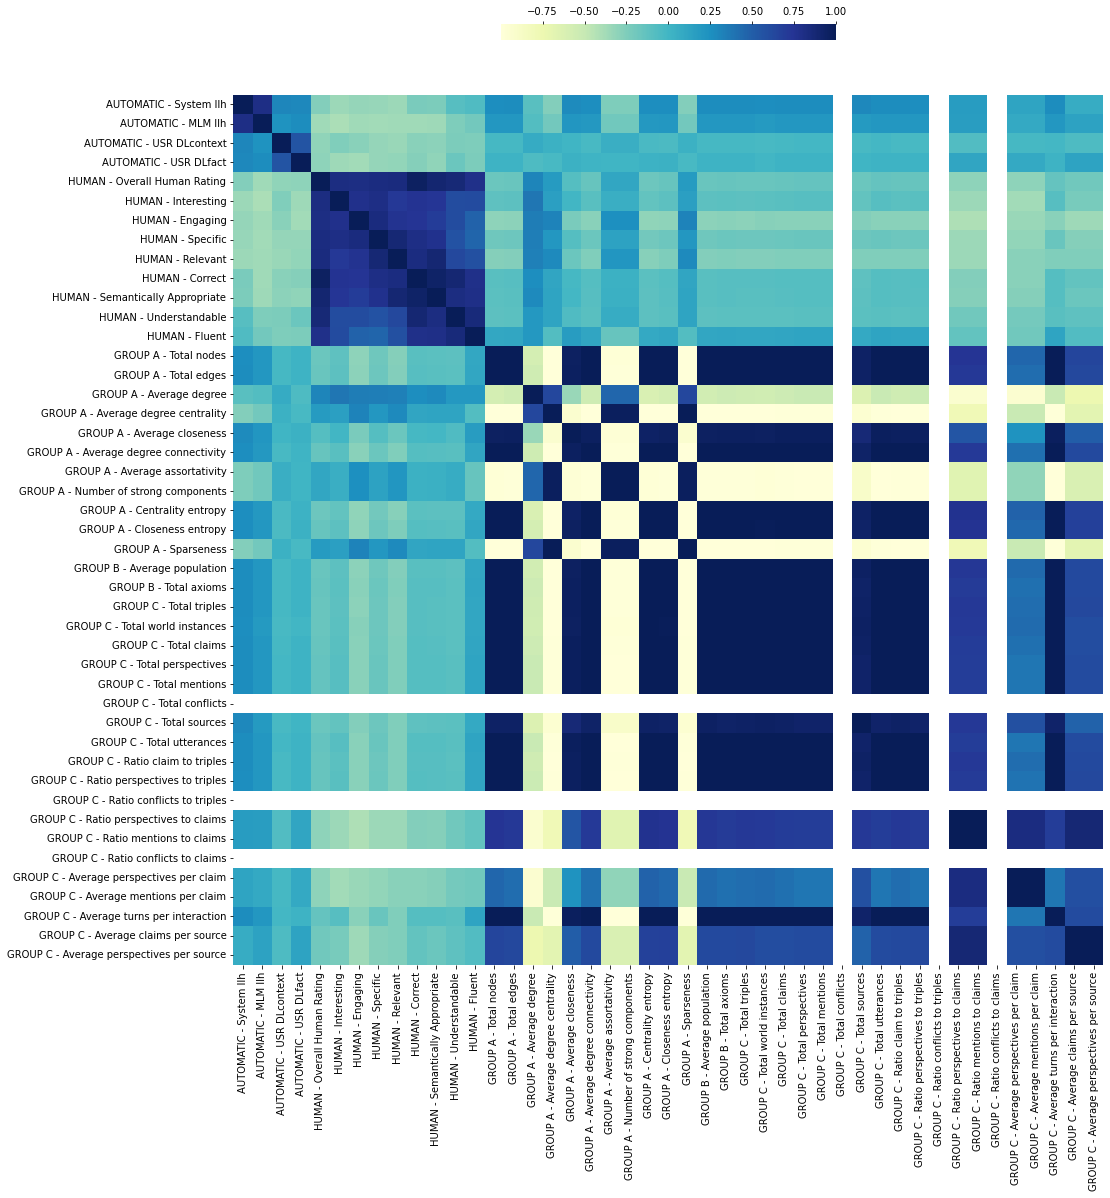

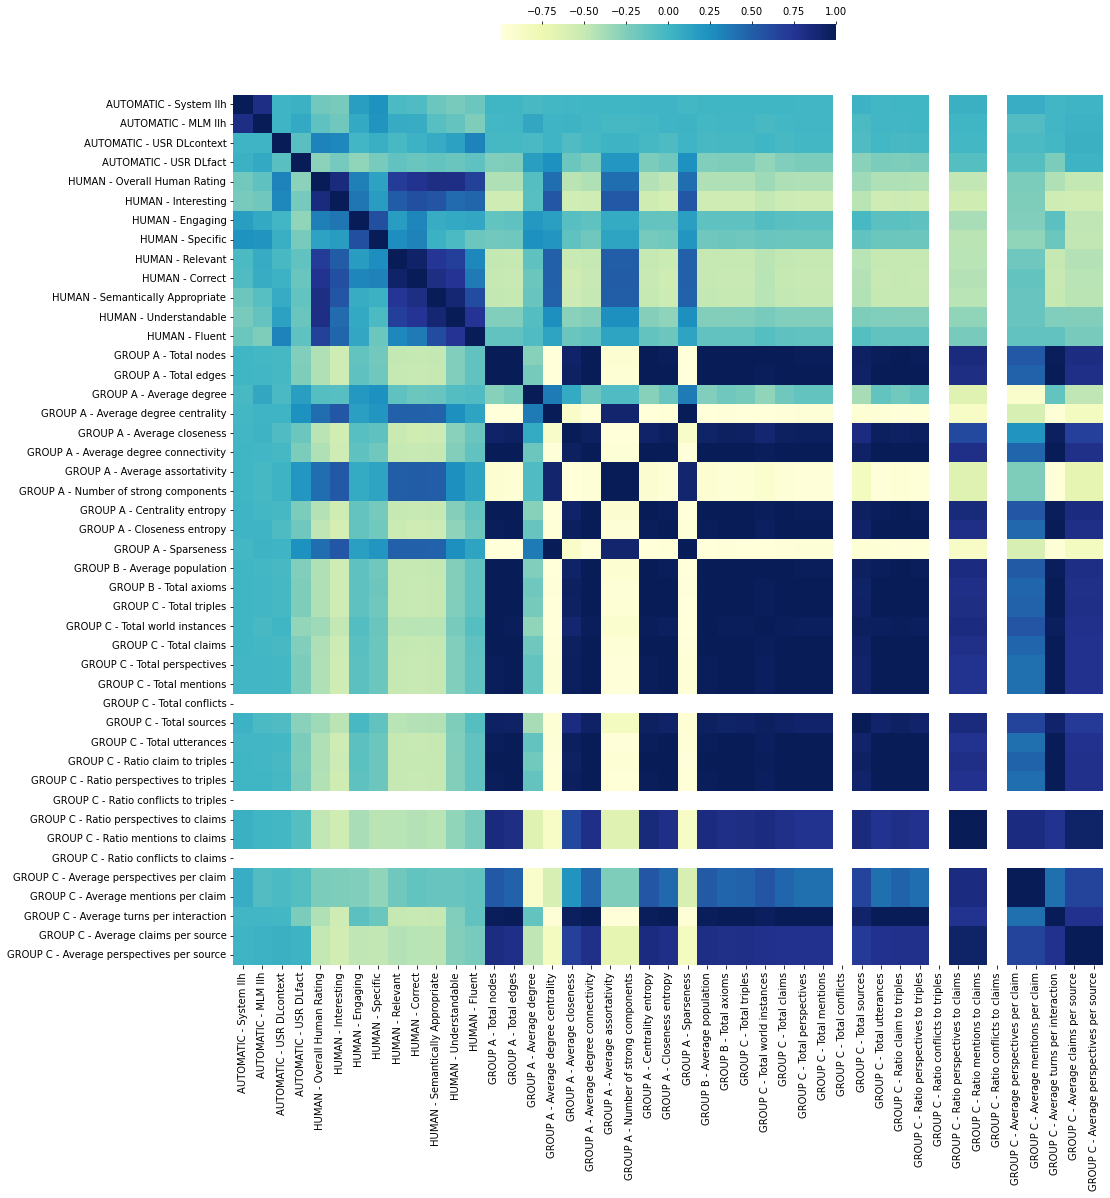

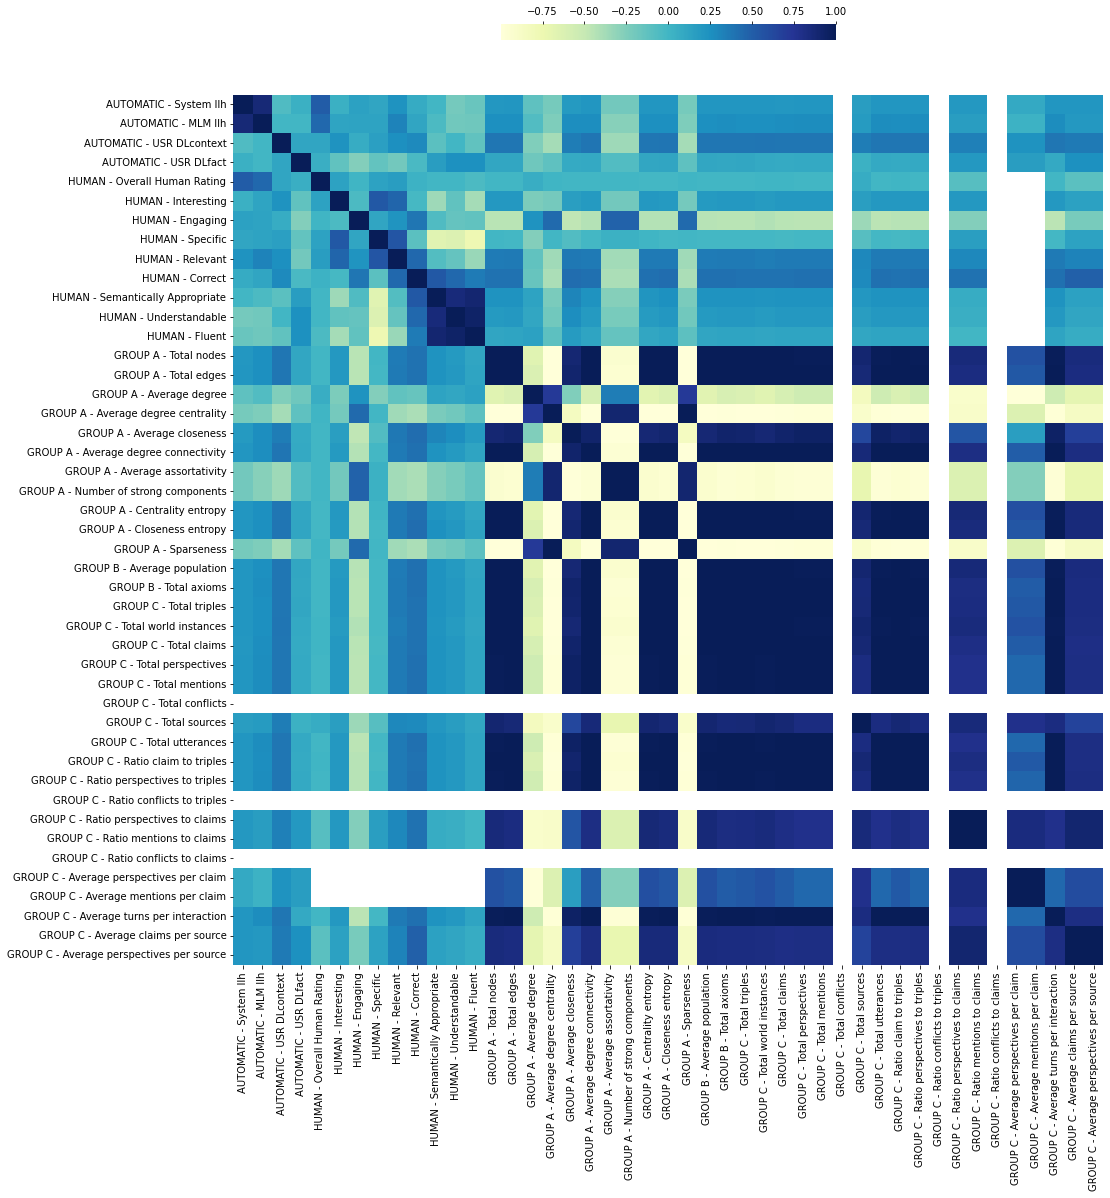

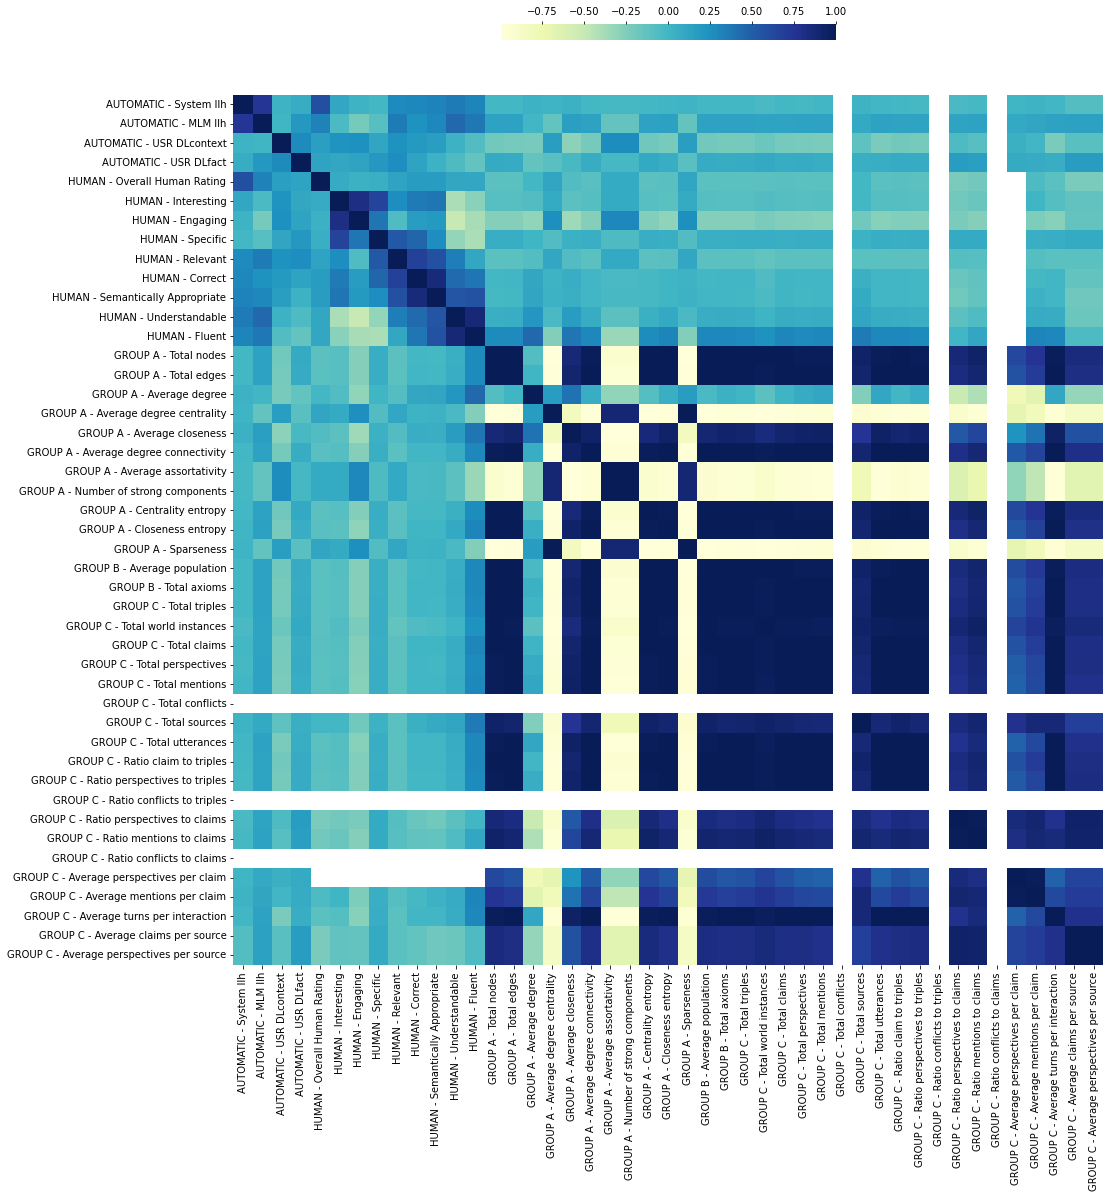

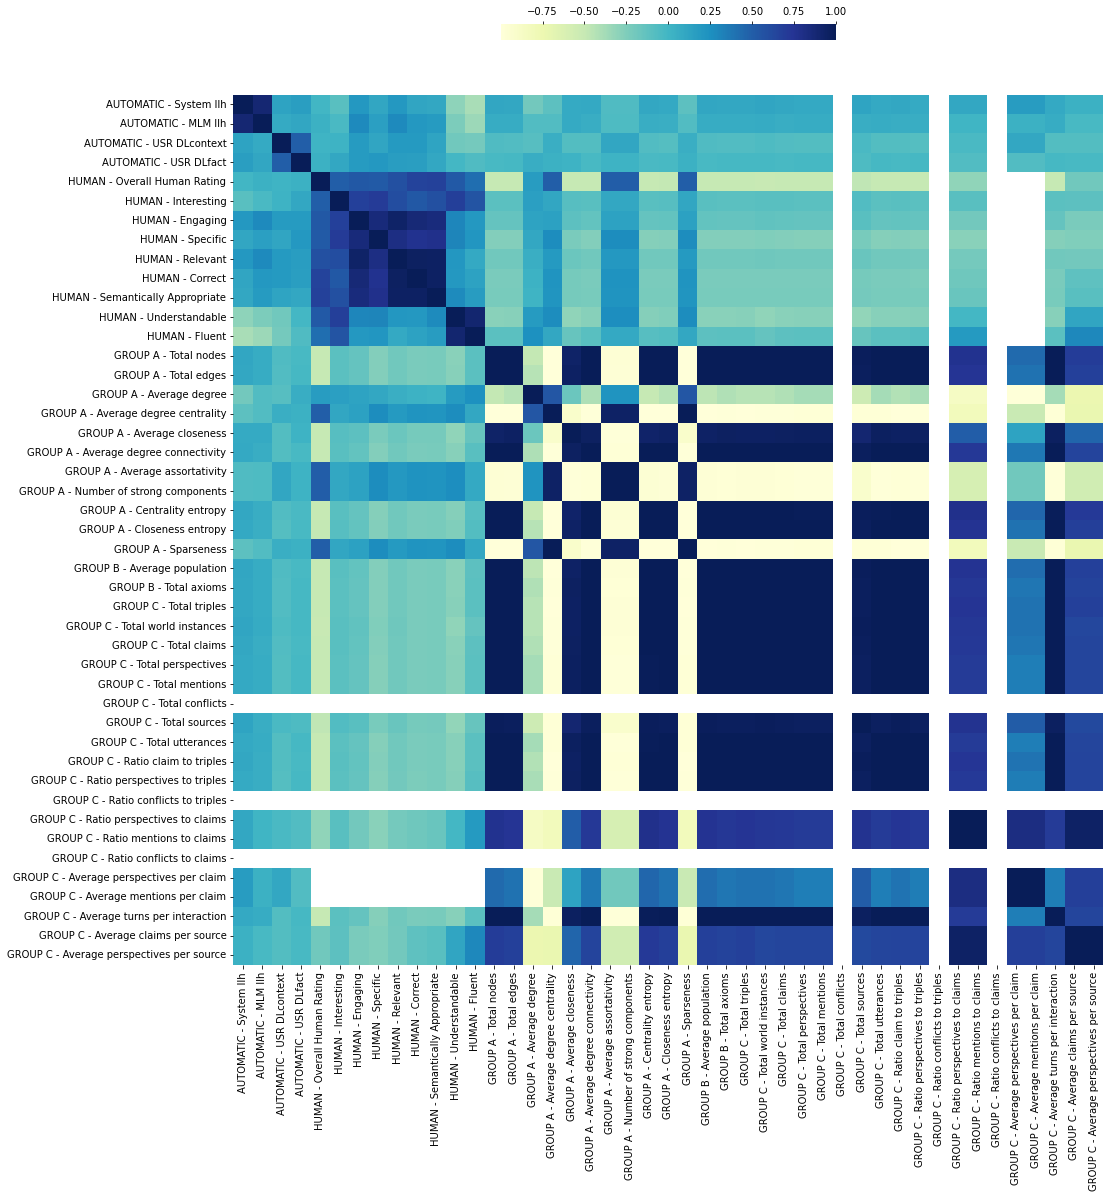

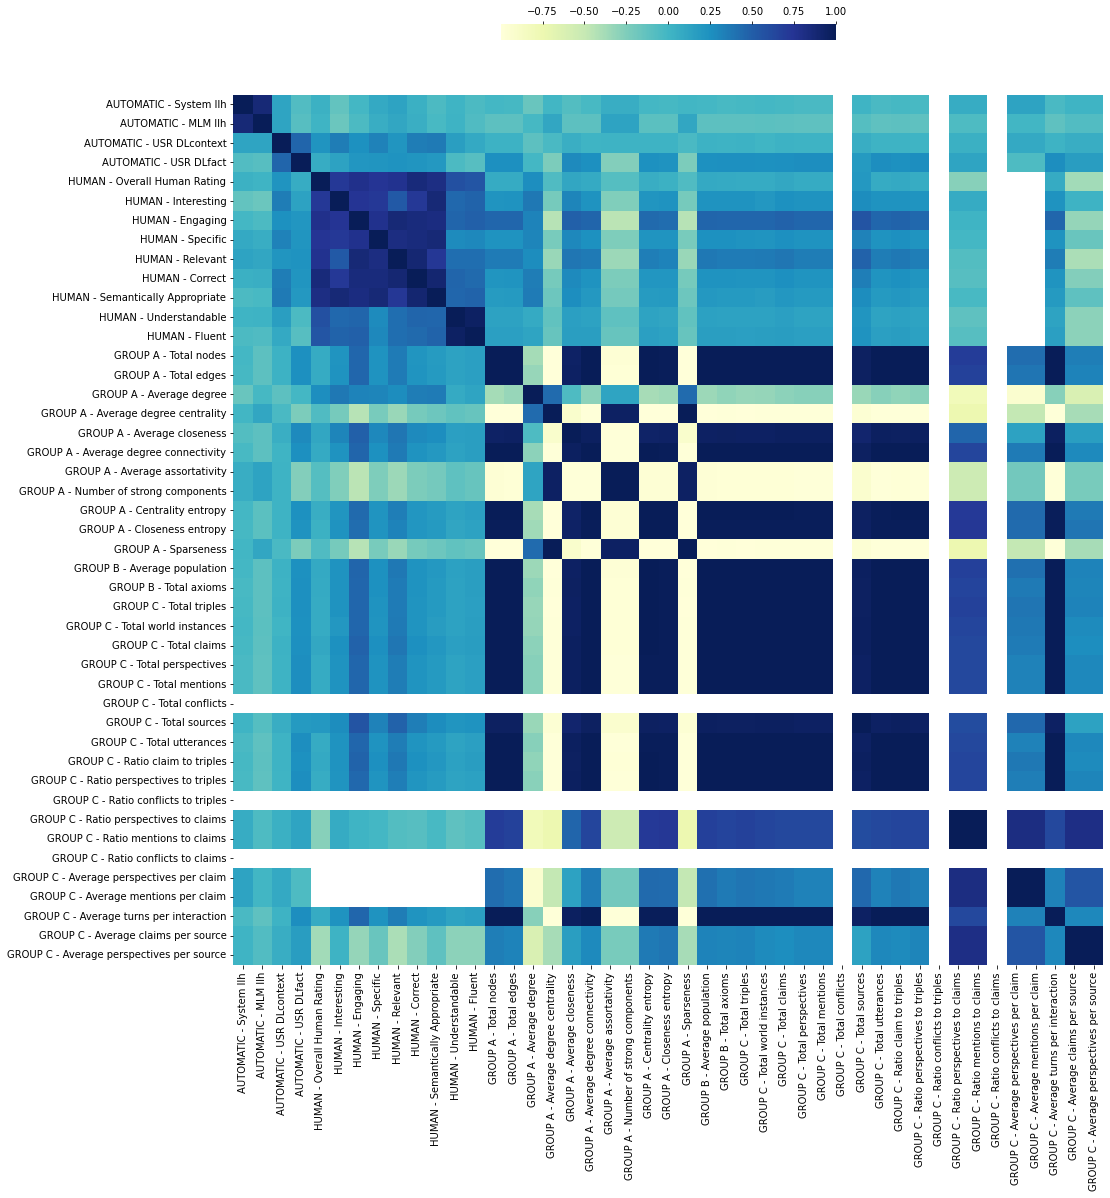

In [9]:
# all correlations

corr_dfs = []

for convo_df, file_name in zip(convo_dfs, STATS_FILES):
    # Compute correlations
    corr_df = convo_df.corr(method='pearson')

    # Plot
    plot_name = file_name.rsplit('/', 2)[0]
    plot_correlations(corr_df, None, plot_name)

    corr_dfs.append(corr_df)


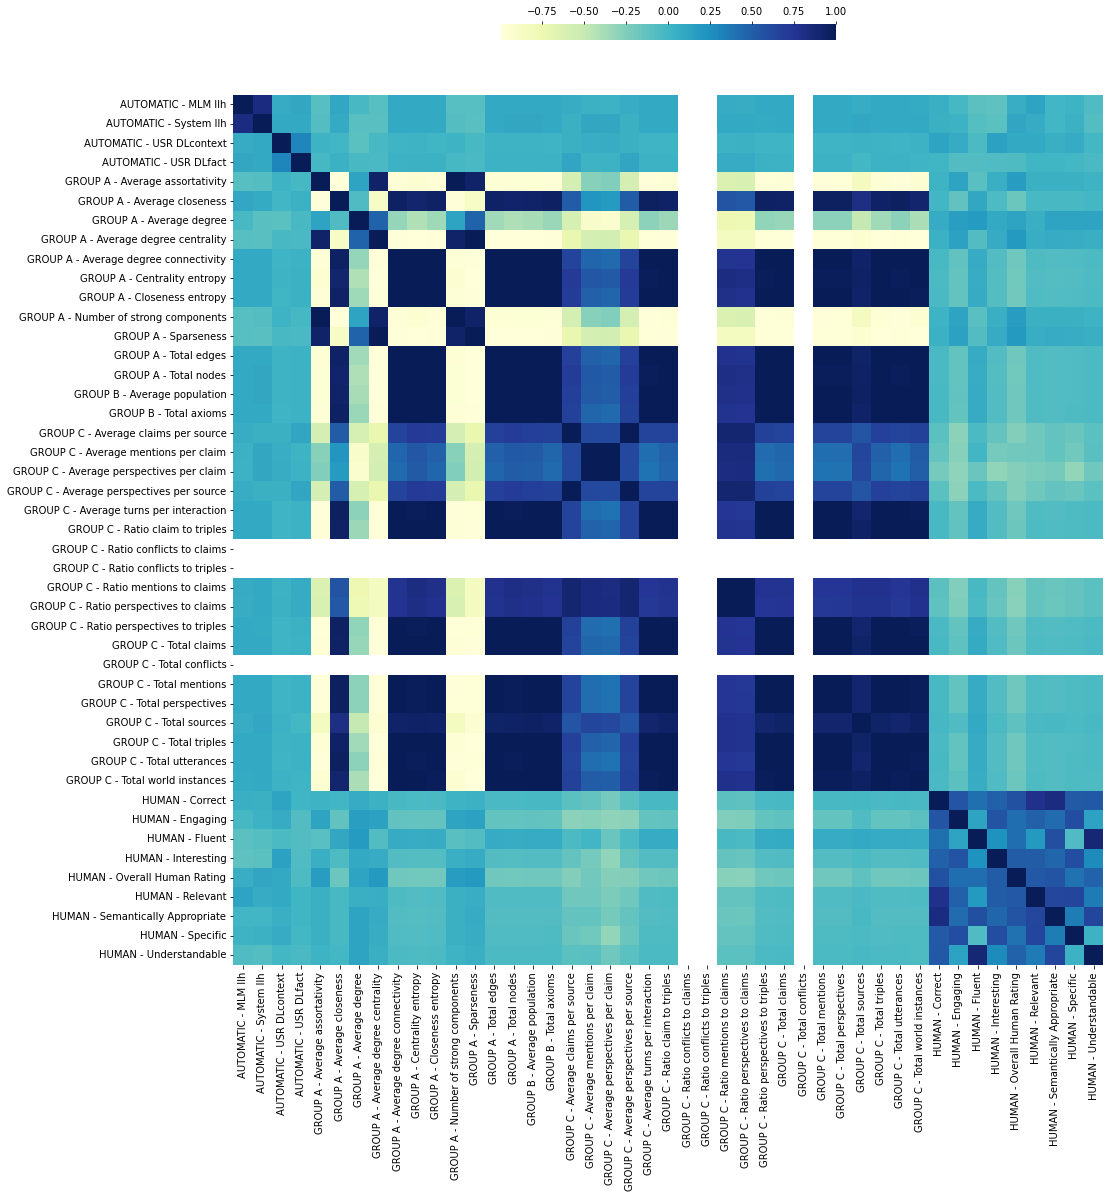

In [10]:
# Average conversations
avg_df = pd.concat(corr_dfs).groupby(level=0).mean()
avg_df = avg_df.reindex(sorted(avg_df.columns), axis=1)
plot_correlations(avg_df, None, 'aggregation')


In [11]:
# Average degree
avg_df.loc[['HUMAN - Overall Human Rating', 'HUMAN - Interesting', 'HUMAN - Engaging', 'HUMAN - Specific',
            'HUMAN - Relevant', 'HUMAN - Correct', 'HUMAN - Semantically Appropriate', 'HUMAN - Understandable',
            'HUMAN - Fluent'],
           ['GROUP A - Average degree', 'GROUP A - Sparseness', 'AUTOMATIC - USR DLcontext', 'AUTOMATIC - USR DLfact']]


,GROUP A - Average degree,GROUP A - Sparseness,AUTOMATIC - USR DLcontext,AUTOMATIC - USR DLfact
HUMAN - Overall Human Rating,0.119731,0.194072,0.087895,-0.051862
HUMAN - Interesting,0.087700,0.076907,0.147700,-0.057913
HUMAN - Engaging,0.157222,0.144602,0.076429,-0.068269
HUMAN - Specific,0.123578,0.066632,0.071672,-0.009875
HUMAN - Relevant,0.055137,0.062183,0.091428,0.005346
HUMAN - Correct,0.071418,0.039983,0.127719,0.007525
HUMAN - Semantically Appropriate,0.123673,0.075811,0.053070,0.008232
HUMAN - Understandable,0.119000,0.049865,-0.013378,-0.030112
HUMAN - Fluent,0.183625,-0.061438,-0.039078,-0.067381


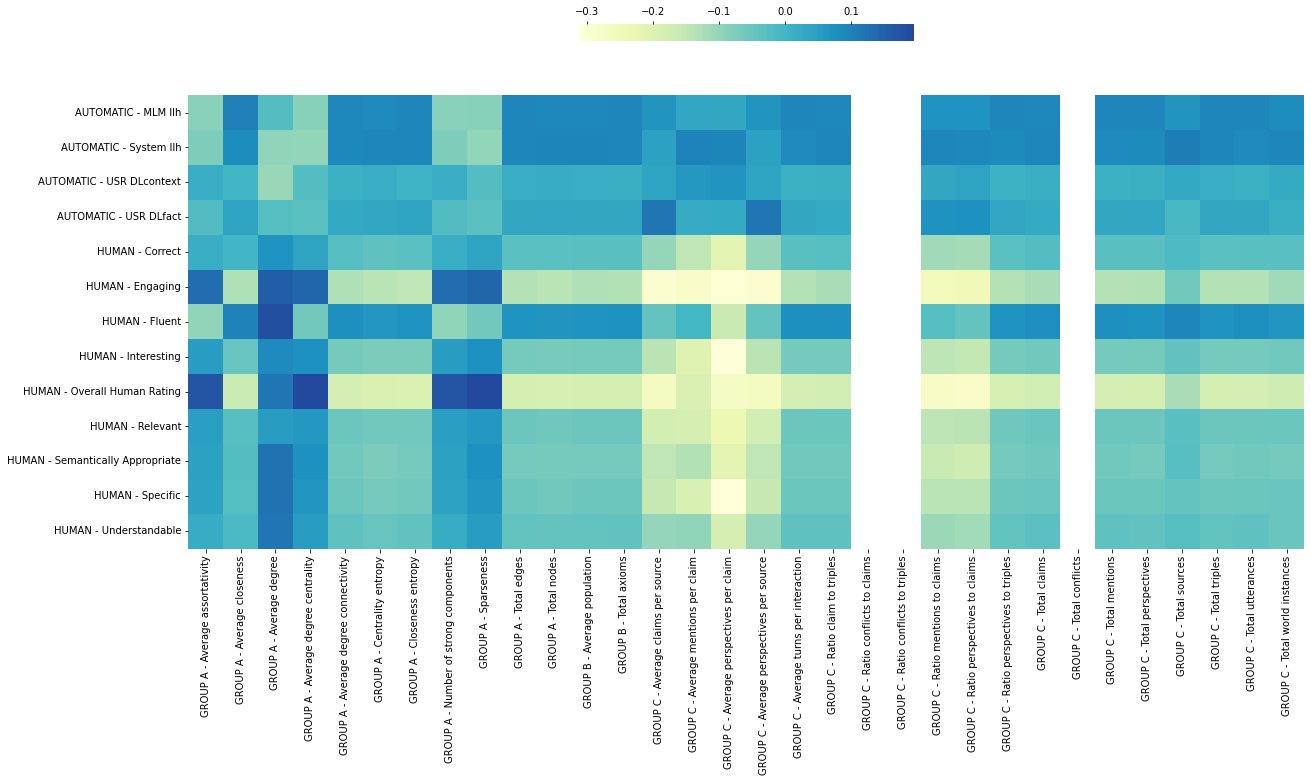

In [12]:
# Average conversations, zoomed in
avg_df = pd.concat(corr_dfs).groupby(level=0).mean()
avg_df = avg_df.reindex(sorted(avg_df.columns), axis=1)

# Zoom into the rectangle we want
human_auto_metrics = np.r_[:4, 36:45]
avg_df = avg_df.loc[avg_df.columns[human_auto_metrics]]
avg_df = avg_df[avg_df.columns[4:-9]]

plot_correlations(avg_df, None, 'aggregation')


In [13]:
# Max correlated per automatic and human metric
most_corr = pd.DataFrame({'metric': avg_df.idxmax(axis=1), 'correlation_value': avg_df.max(axis=1)})
most_corr

,metric,correlation_value
AUTOMATIC - MLM llh,GROUP A - Average closeness,0.103158
AUTOMATIC - System llh,GROUP C - Total sources,0.108794
AUTOMATIC - USR DLcontext,GROUP C - Average perspectives per claim,0.068357
AUTOMATIC - USR DLfact,GROUP C - Average claims per source,0.117838
HUMAN - Correct,GROUP A - Average degree,0.071418
HUMAN - Engaging,GROUP A - Average degree,0.157222
HUMAN - Fluent,GROUP A - Average degree,0.183625
HUMAN - Interesting,GROUP A - Average degree,0.087700
HUMAN - Overall Human Rating,GROUP A - Sparseness,0.194072
HUMAN - Relevant,GROUP A - Sparseness,0.062183


### Plot for one metric, different conversations

In [14]:
def plot_progression(df_to_plot, name, xlabel, plot_type):
    df_to_plot = df_to_plot.reset_index().melt('Turn', var_name='cols', value_name=xlabel)

    if plot_type == 'catplot':
        g = sns.catplot(x="Turn", y=xlabel, hue='cols', data=df_to_plot, kind='point')
    elif plot_type == 'relplot':
        g = sns.relplot(x="Turn", y=xlabel, hue='cols', data=df_to_plot, kind='line')
    elif plot_type == 'displot':
        g = sns.displot(x="Turn", y=xlabel, hue='cols', data=df_to_plot, kind='kde')
    elif plot_type == 'lmplot':
        g = sns.lmplot(x="Turn", y=xlabel, hue='cols', data=df_to_plot)

    ax = plt.gca()
    plt.xlim(0)
    plt.xticks(ax.get_xticks()[::5], rotation="045")

    plot_file = DATA_FOLDER + f"{name}" + OUTPUT_FOLDER + f"{xlabel}_{plot_type}.png"
    print(plot_file)

    g.figure.savefig(plot_file, dpi=300)


./../../data/aggregation/plots/GROUP A - Average degree_catplot.png
./../../data/aggregation/plots/GROUP A - Average degree_relplot.png
./../../data/aggregation/plots/HUMAN - Engaging_relplot.png
./../../data/aggregation/plots/HUMAN - Fluent_relplot.png


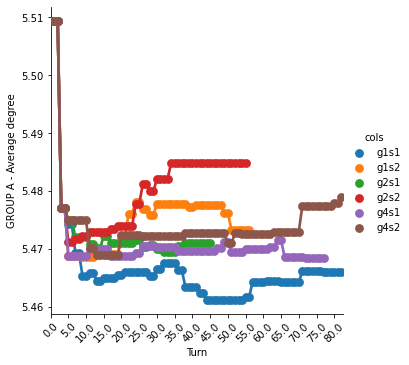

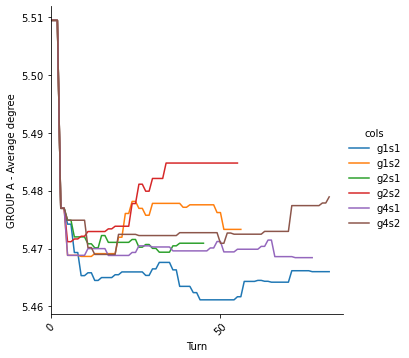

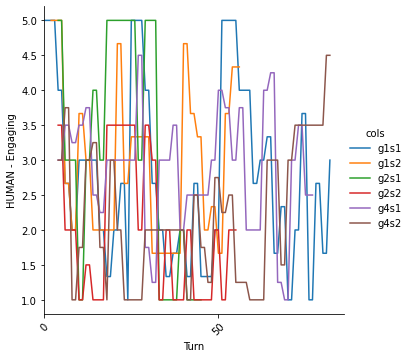

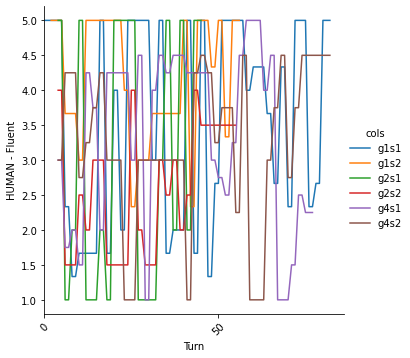

In [15]:
# Plot metrics progression per conversation
def plot_metrics_progression(metrics, convo_dfsl, plot_type):
    for metric in metrics:
        metric_df = pd.DataFrame()
        for convo_df in convo_dfs:
            convo = convo_df['Conversation'].values[0]
            metric_df[convo] = convo_df[metric]

        plot_progression(metric_df, "aggregation", metric, plot_type)


plot_metrics_progression(['GROUP A - Average degree'], convo_dfs, plot_type='catplot')
plot_metrics_progression(['GROUP A - Average degree'], convo_dfs, plot_type='relplot')
metrics_1 = ['HUMAN - Engaging', 'HUMAN - Fluent']
plot_metrics_progression(metrics_1, convo_dfs, plot_type='relplot')

./../../data/aggregation/plots/GROUP A - Sparseness_catplot.png
./../../data/aggregation/plots/GROUP A - Sparseness_relplot.png
./../../data/aggregation/plots/HUMAN - Overall Human Rating_relplot.png
./../../data/aggregation/plots/HUMAN - Fluent_relplot.png


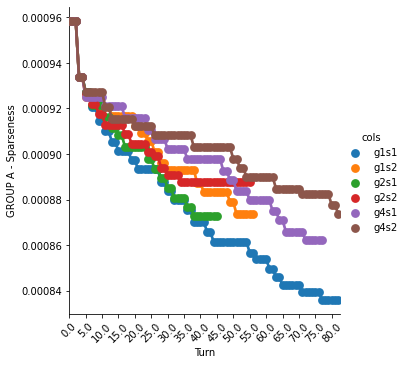

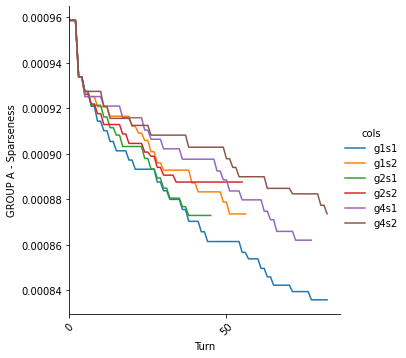

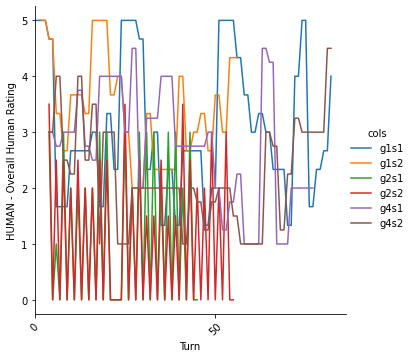

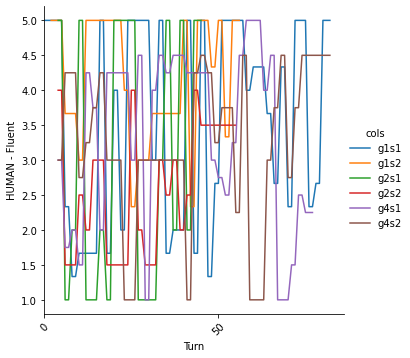

In [16]:

plot_metrics_progression(['GROUP A - Sparseness'], convo_dfs, plot_type='catplot')
plot_metrics_progression(['GROUP A - Sparseness'], convo_dfs, plot_type='relplot')
metrics_2 = ['HUMAN - Overall Human Rating', 'HUMAN - Fluent']
plot_metrics_progression(metrics_2, convo_dfs, plot_type='relplot')


./../../data/aggregation/plots/GROUP C - Ratio claim to triples_catplot.png
./../../data/aggregation/plots/GROUP C - Ratio perspectives to triples_catplot.png
./../../data/aggregation/plots/GROUP C - Ratio conflicts to triples_catplot.png
./../../data/aggregation/plots/GROUP C - Ratio perspectives to claims_catplot.png
./../../data/aggregation/plots/GROUP C - Ratio mentions to claims_catplot.png
./../../data/aggregation/plots/GROUP C - Ratio conflicts to claims_catplot.png
./../../data/aggregation/plots/GROUP C - Average perspectives per claim_catplot.png
./../../data/aggregation/plots/GROUP C - Average mentions per claim_catplot.png
./../../data/aggregation/plots/GROUP C - Average turns per interaction_catplot.png
./../../data/aggregation/plots/GROUP C - Average claims per source_catplot.png
./../../data/aggregation/plots/GROUP C - Average perspectives per source_catplot.png


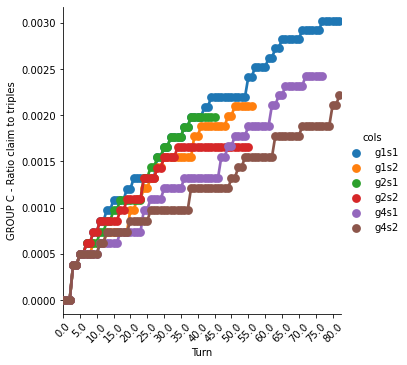

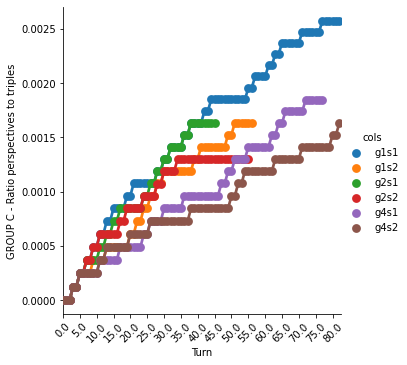

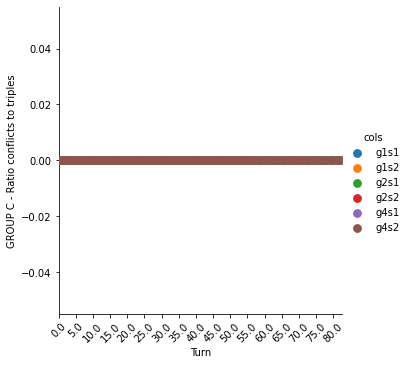

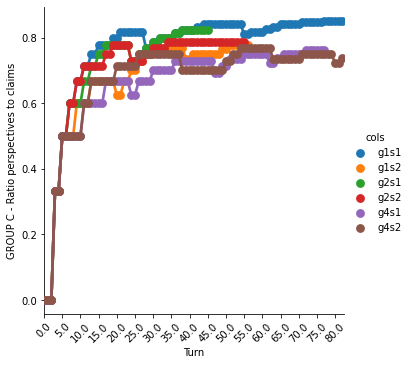

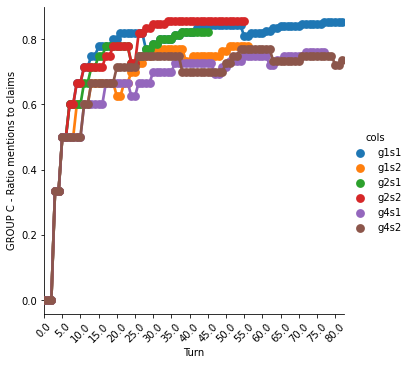

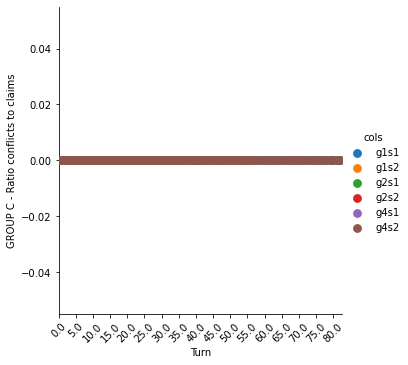

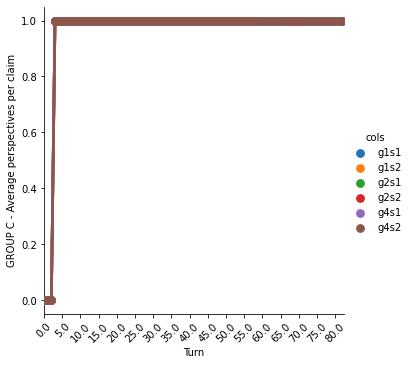

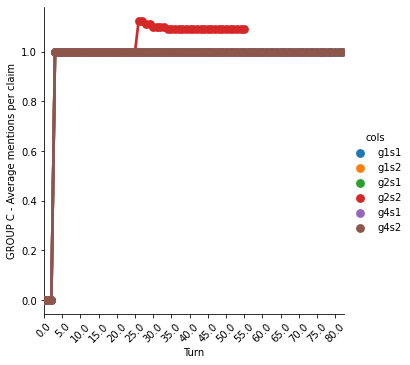

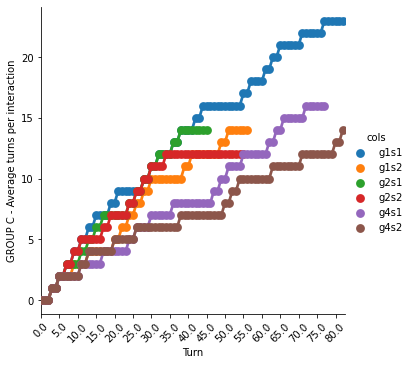

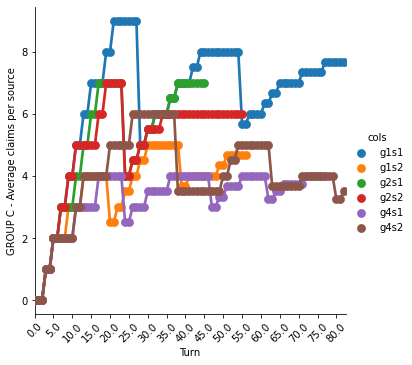

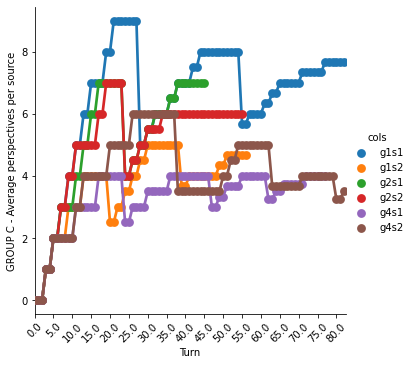

In [17]:
metrics_3 = ['GROUP C - Ratio claim to triples', 'GROUP C - Ratio perspectives to triples',
             'GROUP C - Ratio conflicts to triples',
             'GROUP C - Ratio perspectives to claims', 'GROUP C - Ratio mentions to claims',
             'GROUP C - Ratio conflicts to claims',
             'GROUP C - Average perspectives per claim',
             'GROUP C - Average mentions per claim', 'GROUP C - Average turns per interaction',
             'GROUP C - Average claims per source', 'GROUP C - Average perspectives per source']
plot_metrics_progression(metrics_3, convo_dfs, plot_type='catplot')

./../../data/aggregation/plots/GROUP C - Ratio claim to triples_relplot.png
./../../data/aggregation/plots/GROUP C - Ratio perspectives to triples_relplot.png
./../../data/aggregation/plots/GROUP C - Ratio conflicts to triples_relplot.png
./../../data/aggregation/plots/GROUP C - Ratio perspectives to claims_relplot.png
./../../data/aggregation/plots/GROUP C - Ratio mentions to claims_relplot.png
./../../data/aggregation/plots/GROUP C - Ratio conflicts to claims_relplot.png
./../../data/aggregation/plots/GROUP C - Average perspectives per claim_relplot.png
./../../data/aggregation/plots/GROUP C - Average mentions per claim_relplot.png
./../../data/aggregation/plots/GROUP C - Average turns per interaction_relplot.png
./../../data/aggregation/plots/GROUP C - Average claims per source_relplot.png
./../../data/aggregation/plots/GROUP C - Average perspectives per source_relplot.png


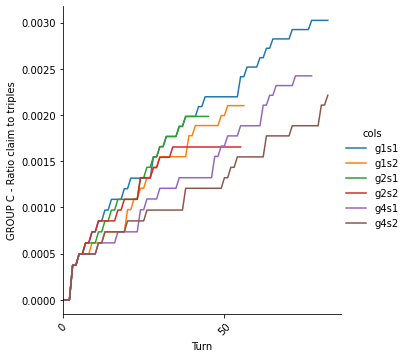

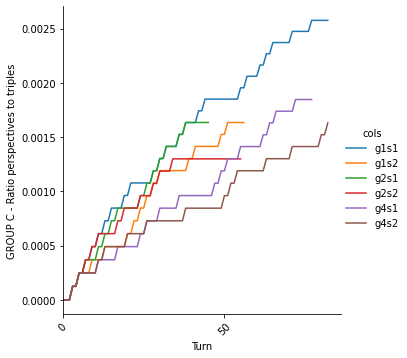

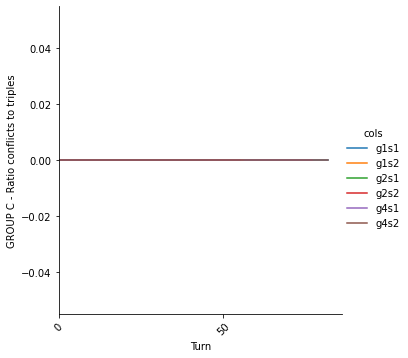

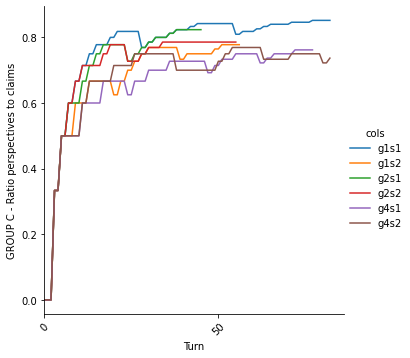

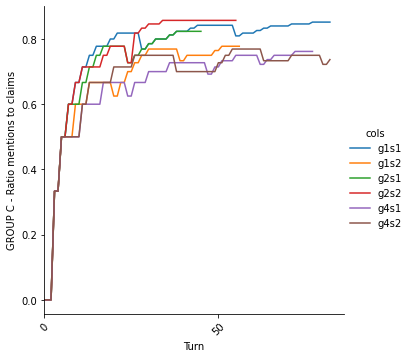

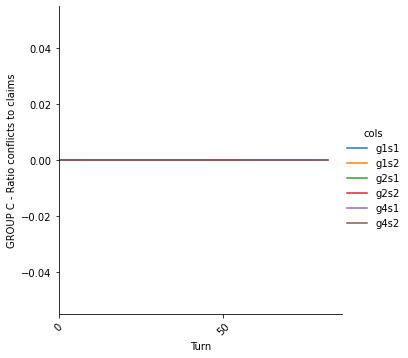

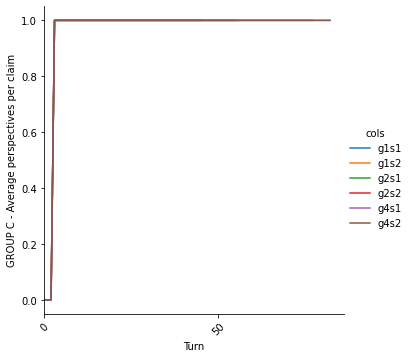

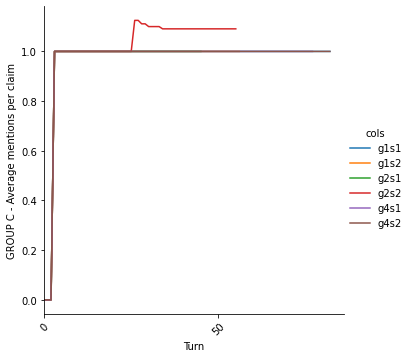

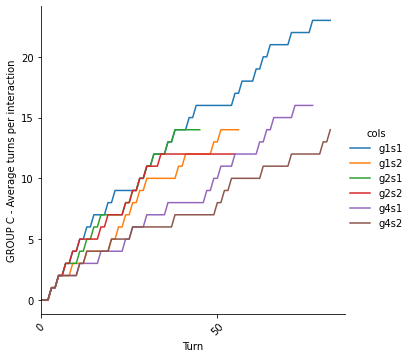

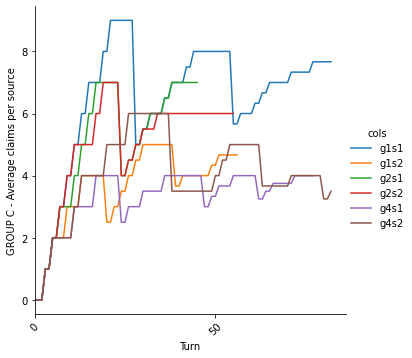

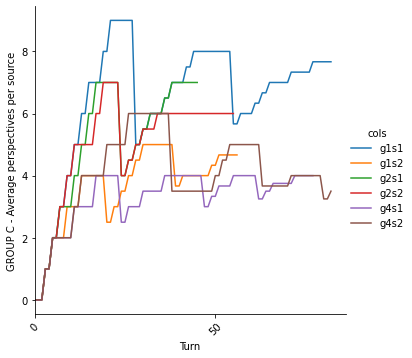

In [18]:
plot_metrics_progression(metrics_3, convo_dfs, plot_type='relplot')